REGRESSION_P512[SOLAR_POWER_GENERATION]

Objective

The variable to be predicted is continuous (energy production). Therefore, this is an Regression project. The primary goal is to model energy production as a function of environmental variables

Data Set Description

The file solarpowergeneration.csv contains the data for this example. Here, the number of variables (columns) is 10, and the number of instances (rows) is 2920. We have the following variables for this analysis:
•	distance_to_solar_noon, in radians.
•	temperature, daily average temperature, in degrees Celsius.
•	wind_direction, daily average wind direction, in degrees (0-360).
•	wind_speed, daily average wind speed, in meters per second.
•	sky_cover, on a five-step scale from 0 to 4, with 0 completely clear and 4 wholly covered.
•	visibility, in kilometers.
•	humidity, in percentage.
•	average_wind_speed, average wind speed during the 3 hours de measure was taken in meters per second.
•	average_pressure, average barometric pressure during the 3 hours the measure was taken in, in mercury inches.
•	power_generated(Target), in Jules for each 3 hour


In [3]:
#importing all necessary library 
import pandas as pd
import pandas as pd
import numpy as np
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [4]:
#reading the csv file using pandas
df=pd.read_csv(r"D:\data science\project\solarpowergeneration.csv")
df

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [5]:
#EDA-exploratory data analyisi
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [6]:
df.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


In [7]:
df.dtypes

distance-to-solar-noon         float64
temperature                      int64
wind-direction                   int64
wind-speed                     float64
sky-cover                        int64
visibility                     float64
humidity                         int64
average-wind-speed-(period)    float64
average-pressure-(period)      float64
power-generated                  int64
dtype: object

In [8]:
df.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'],
      dtype='object')

In [9]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)


Numerical Columns: Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'],
      dtype='object')
Categorical Columns: Index([], dtype='object')


In [10]:
df.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [11]:
df.tail()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677
2919,0.755442,63,27,13.9,1,10.0,81,11.0,29.90,0


In [12]:
df.isnull()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2915,False,False,False,False,False,False,False,False,False,False
2916,False,False,False,False,False,False,False,False,False,False
2917,False,False,False,False,False,False,False,False,False,False
2918,False,False,False,False,False,False,False,False,False,False


In [13]:
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [14]:
df.nunique()

distance-to-solar-noon         2660
temperature                      37
wind-direction                   35
wind-speed                      159
sky-cover                         5
visibility                       17
humidity                         75
average-wind-speed-(period)      32
average-pressure-(period)        90
power-generated                1529
dtype: int64

In [15]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)


       distance-to-solar-noon  temperature  wind-direction   wind-speed  \
count             2920.000000  2920.000000     2920.000000  2920.000000   
mean                 0.503294    58.468493       24.953425    10.096986   
std                  0.298024     6.841200        6.915178     4.838185   
min                  0.050401    42.000000        1.000000     1.100000   
25%                  0.243714    53.000000       25.000000     6.600000   
50%                  0.478957    59.000000       27.000000    10.000000   
75%                  0.739528    63.000000       29.000000    13.100000   
max                  1.141361    78.000000       36.000000    26.600000   

         sky-cover   visibility     humidity  average-wind-speed-(period)  \
count  2920.000000  2920.000000  2920.000000                  2919.000000   
mean      1.987671     9.557705    73.513699                    10.129154   
std       1.411978     1.383884    15.077139                     7.261547   
min       0.0000

In [16]:
df.shape

(2920, 10)

In [17]:
df['power-generated'].unique()

array([    0,  5418, 25477, ...,  6995, 29490, 17257], dtype=int64)

In [18]:
df['visibility'].unique()

array([10.  ,  9.  ,  8.  ,  7.  ,  3.  ,  6.  ,  4.  ,  2.  ,  5.  ,
        0.25,  0.  ,  1.5 ,  2.5 ,  0.75,  0.5 ,  1.25,  1.75])

In [19]:
#checking the whether the data is skewed and kurtosis
from scipy.stats import skew, kurtosis

# Compute skewness & kurtosis for each numerical column
for col in df.select_dtypes(include=['number']).columns:
    print(f"{col}: Skewness = {skew(df[col])}, Kurtosis = {kurtosis(df[col])}")


distance-to-solar-noon: Skewness = 0.21134320534930362, Kurtosis = -0.9876702546562699
temperature: Skewness = 0.12585143292146822, Kurtosis = -0.28896437993228163
wind-direction: Skewness = -1.6286820343743007, Kurtosis = 1.8513899851275664
wind-speed: Skewness = 0.41663716234376796, Kurtosis = 0.07641708048304796
sky-cover: Skewness = 0.08024284663711184, Kurtosis = -1.3412145724387403
visibility: Skewness = -3.8604618063924376, Kurtosis = 15.689537558592292
humidity: Skewness = -0.955116245900621, Kurtosis = 0.8686720932862335
average-wind-speed-(period): Skewness = nan, Kurtosis = nan
average-pressure-(period): Skewness = 0.44115698008250664, Kurtosis = 0.34965226250469916
power-generated: Skewness = 1.3063635464265997, Kurtosis = 0.33956634120006557


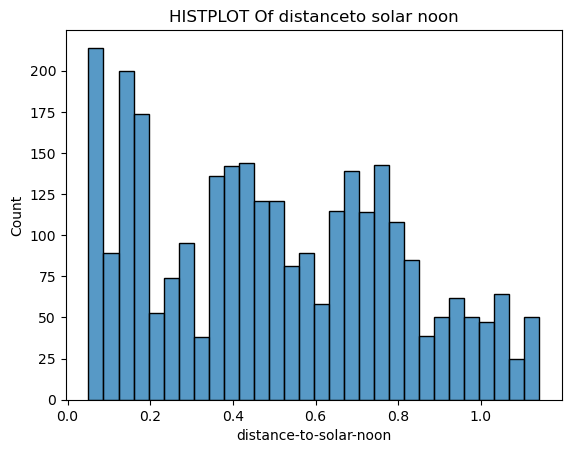

In [20]:
#visualizing the data using historgram of each feature
import matplotlib.pyplot as plt
sns.histplot(df['distance-to-solar-noon'], bins=30)
plt.title('HISTPLOT Of distanceto solar noon')
plt.show()

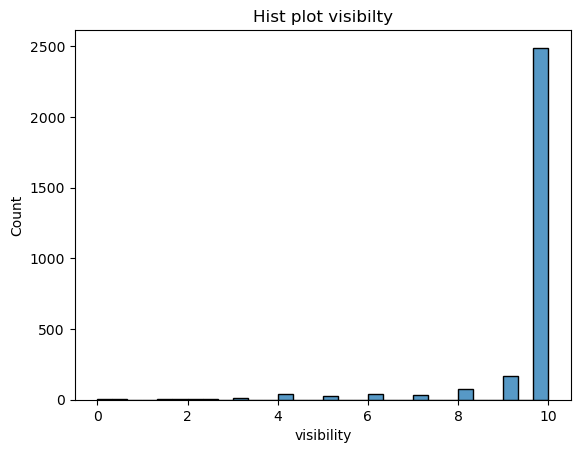

In [21]:
import matplotlib.pyplot as plt
sns.histplot(df['visibility'], bins=30)
plt.title('Hist plot visibilty')
plt.show()

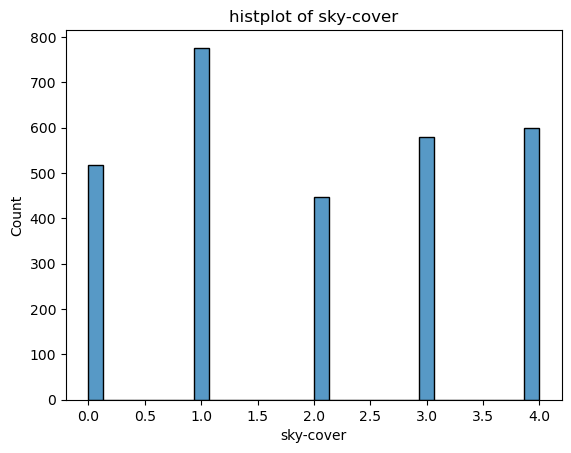

In [22]:
import matplotlib.pyplot as plt
sns.histplot(df['sky-cover'], bins=30)
plt.title('histplot of sky-cover')
plt.show()

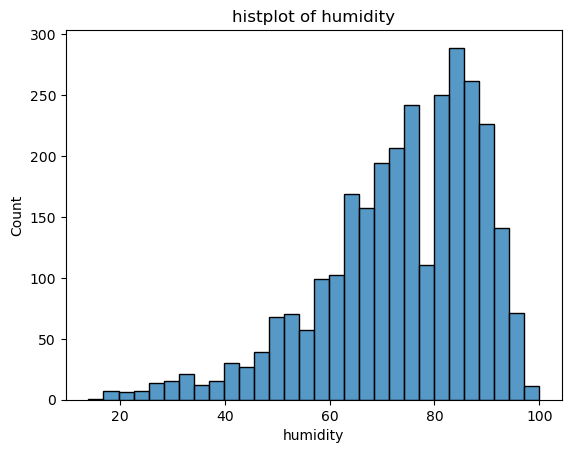

In [23]:
import matplotlib.pyplot as plt
sns.histplot(df['humidity'], bins=30)
plt.title('histplot of humidity')
plt.show()

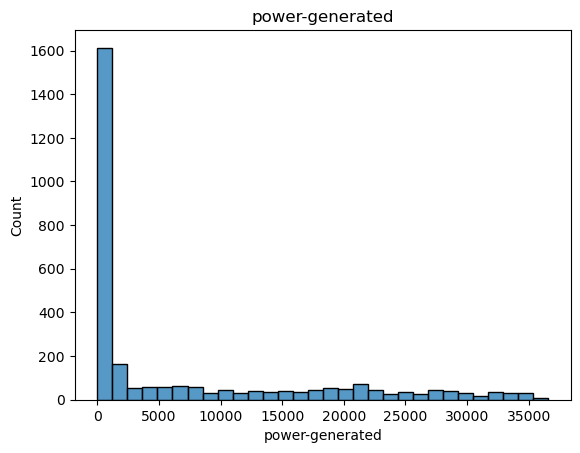

In [24]:
import matplotlib.pyplot as plt
sns.histplot(df['power-generated'], bins=30)
plt.title('power-generated')
plt.show()

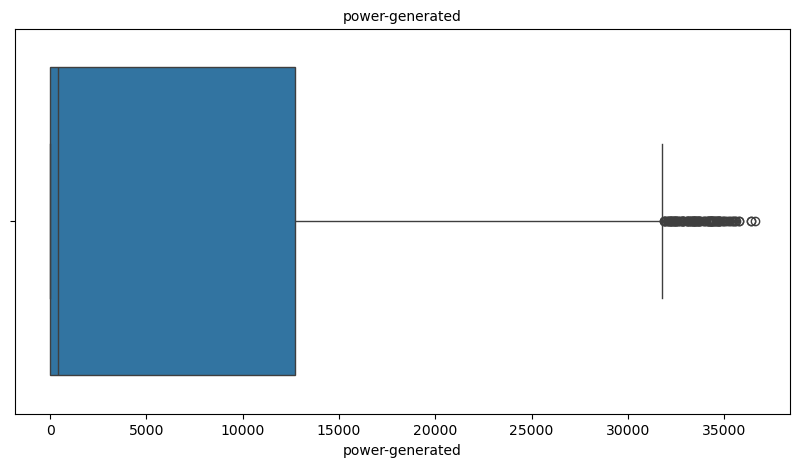

In [25]:
# Box plot for a specific feature
plt.figure(figsize=(10, 5))
sns.boxplot(x='power-generated', data=df)
plt.title('power-generated', fontsize=10, color='black', loc='center')
plt.show()

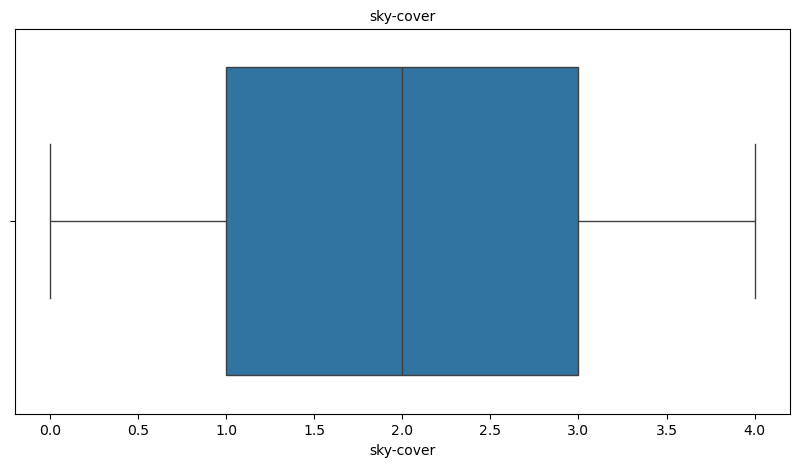

In [26]:
# Box plot for a specific feature
plt.figure(figsize=(10, 5))
sns.boxplot(x='sky-cover', data=df)
plt.title('sky-cover', fontsize=10, color='black', loc='center')
plt.show()

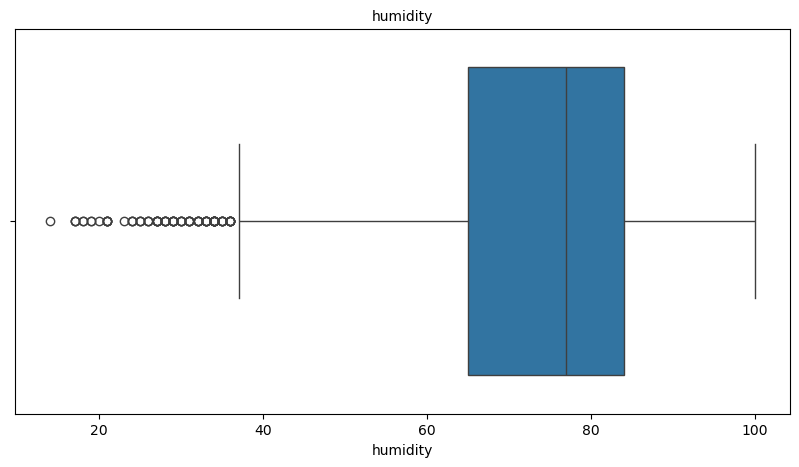

In [27]:
# Box plot for a specific feature
plt.figure(figsize=(10, 5))
sns.boxplot(x='humidity', data=df)
plt.title('humidity', fontsize=10, color='black', loc='center')
plt.show()

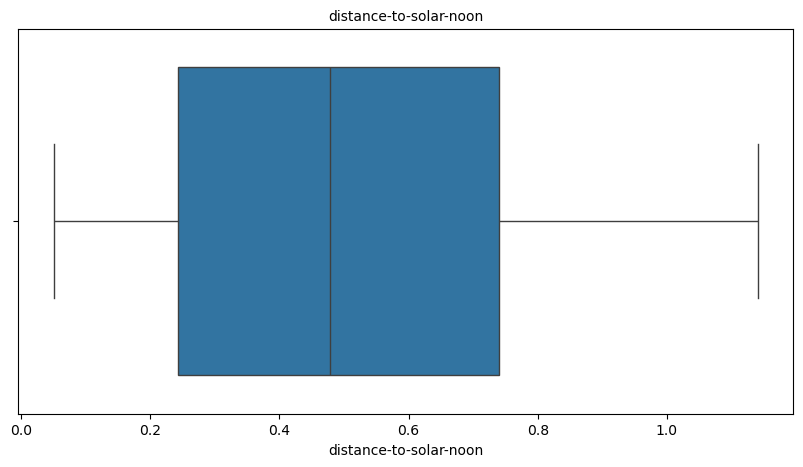

In [28]:
# Box plot for a specific feature
plt.figure(figsize=(10, 5))
sns.boxplot(x='distance-to-solar-noon', data=df)
plt.title('distance-to-solar-noon', fontsize=10, color='black', loc='center')
plt.show()

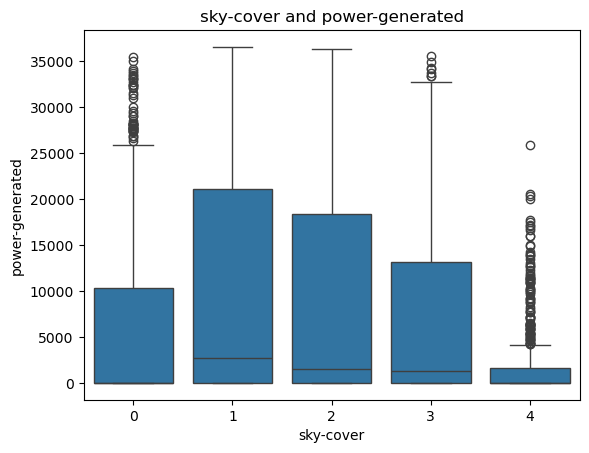

In [29]:
sns.boxplot(x='sky-cover', y='power-generated', data=df)
plt.title('sky-cover and power-generated')
plt.show()

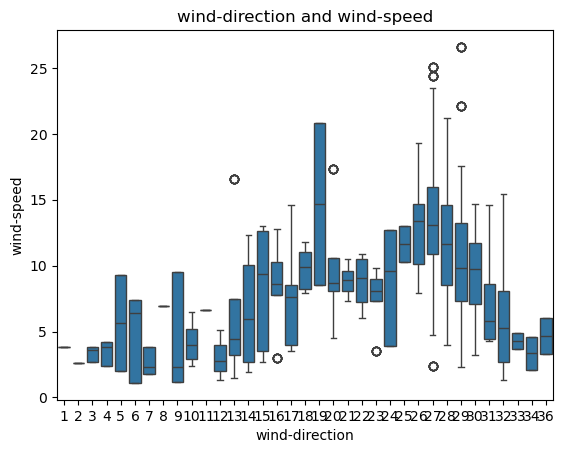

In [30]:
sns.boxplot(x='wind-direction', y='wind-speed', data=df)
plt.title('wind-direction and wind-speed')
plt.show()

In [31]:
#using z-score of identifying the outliers of each feature of data
from scipy.stats import zscore

# Compute Z-score for numerical columns
df_zscores = df.select_dtypes(include=['number']).apply(zscore)
df_zscores

# Identify outliers (|Z-score| > 3)
outliers = (df_zscores.abs() > 3).any(axis=1)
outliers
# Display outliers
print("Outliers found:", df[outliers])


Outliers found:       distance-to-solar-noon  temperature  wind-direction  wind-speed  \
4                   0.065553           69              28         7.5   
5                   0.296915           69              28         7.5   
12                  0.065722           72              29         6.8   
21                  0.298836           73              29         7.9   
30                  0.533074           76              30         6.9   
...                      ...          ...             ...         ...   
2042                0.359155           60              27        21.5   
2068                0.063011           74              30         9.0   
2524                0.050401           70              28        10.6   
2882                0.393671           71              29         9.8   
2893                0.290978           78              29         6.6   

      sky-cover  visibility  humidity  average-wind-speed-(period)  \
4             0       10.00        21

In [32]:
#removing the outliers using IQR for each feature
import numpy as np

# Select numerical columns
numerical_cols = ['distance-to-solar-noon', 'temperature', 'wind-direction','wind-speed', 'sky-cover', 'visibility', 'humidity', 
                  'average-wind-speed-(period)', 'average-pressure-(period)', 'power-generated']

# Compute IQR for each feature
for col in numerical_cols:
    Q1 = np.percentile(df[col], 25)  # 25th percentile (Q1)
    Q3 = np.percentile(df[col], 75)  # 75th percentile (Q3)
    IQR = Q3 - Q1  # Compute IQR
    
    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)
    
    print(f"{col}: {outliers.sum()} outliers found")
    

distance-to-solar-noon: 0 outliers found
temperature: 0 outliers found
wind-direction: 528 outliers found
wind-speed: 40 outliers found
sky-cover: 0 outliers found
visibility: 429 outliers found
humidity: 83 outliers found
average-wind-speed-(period): 0 outliers found
average-pressure-(period): 31 outliers found
power-generated: 107 outliers found


In [33]:
# Remove outliers from all numerical columns
for col in numerical_cols:
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only non-outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Outliers removed. New dataset shape:", df.shape)


Outliers removed. New dataset shape: (2001, 10)


In [34]:
#log transformation used 
df['visibility'] = np.log1p(df['visibility'])  # Log transformation
df['power-generated'] = np.sqrt(df['power-generated'])  # Square root transformation
df['power-generated']


0         0.000000
1         0.000000
2        73.607065
3       159.615162
6        22.693611
           ...    
2915     83.636117
2916    171.726527
2917    131.365901
2918     26.019224
2919      0.000000
Name: power-generated, Length: 2001, dtype: float64

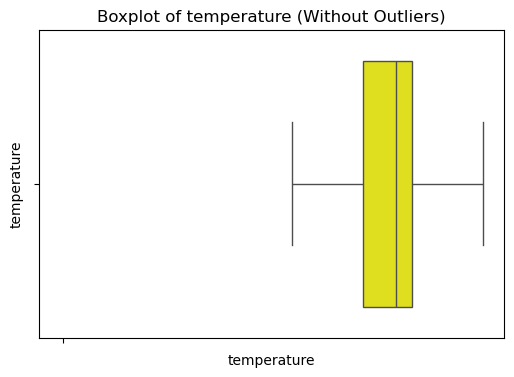

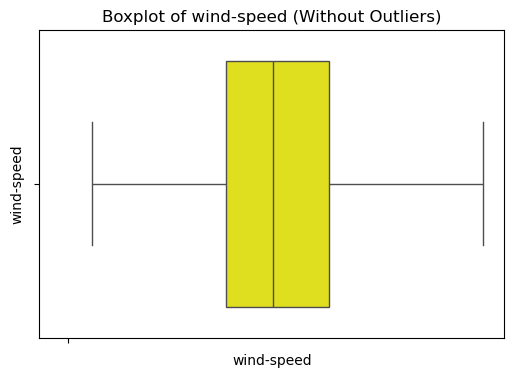

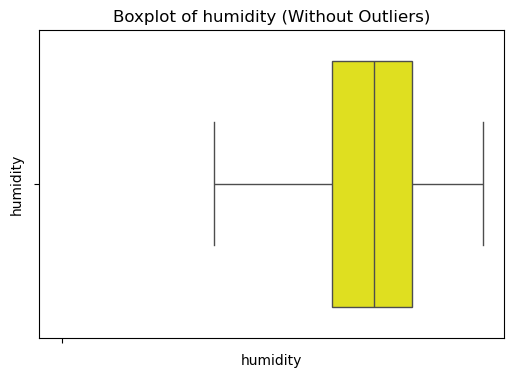

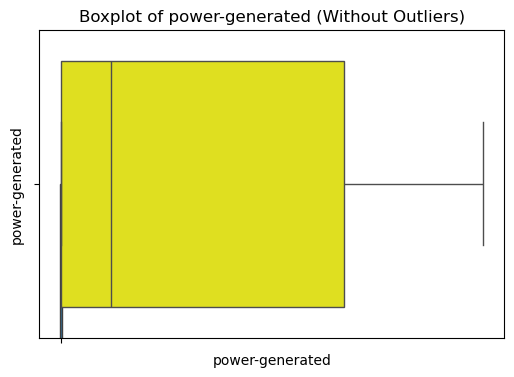

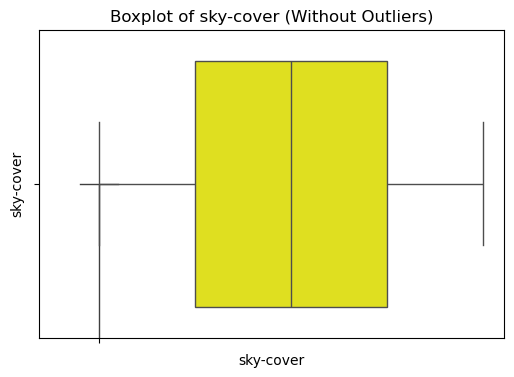

In [35]:
#visualising the data of each feature below without outliers
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot
features = ["temperature", "wind-speed", "humidity", "power-generated","sky-cover",]  # Add all required features

# Plot each feature separately
for feature in features:
    plt.figure(figsize=(6, 4))  # Individual figure for each boxplot
    sns.boxplot(y=df[feature], showfliers=False)# Removes outliers
    sns.boxplot(x=df[feature], showfliers=False, color="yellow")  # Horizontal & Colored
    plt.title(f"Boxplot of {feature} (Without Outliers)")
    plt.show()
    
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[feature], showfliers=False)
    plt.title(f"Boxplot of {feature} (Without Outliers)")
    plt.savefig(f"{feature}_boxplot.png")  # Save each plot
    plt.close()  # Close the figure to save memory
    
    



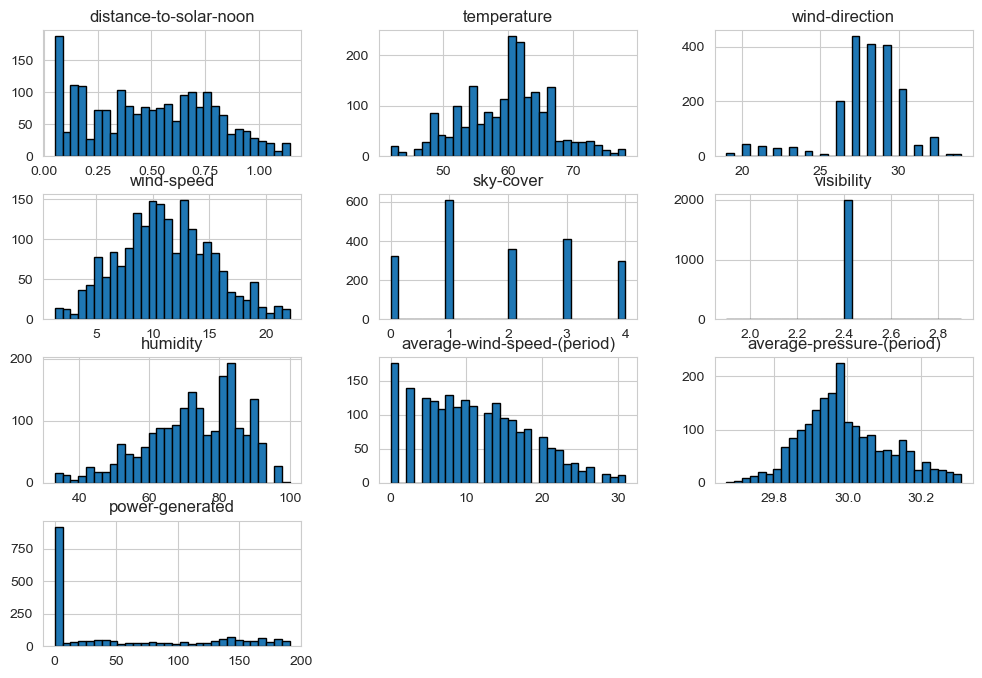

In [36]:
#this histogram of individual feature
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Plot histograms for numerical variables
df.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.show()


In [37]:
#corealtion data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
corelation=df.corr(numeric_only=True)
corelation


,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
distance-to-solar-noon,1.000000,-0.126752,0.012771,-0.143734,0.008609,NaN,0.501279,-0.244281,0.081102,-0.873537
temperature,-0.126752,1.000000,0.244768,-0.069097,-0.199471,NaN,-0.123464,-0.079706,-0.472472,0.075913
wind-direction,0.012771,0.244768,1.000000,-0.132626,-0.388104,NaN,-0.125749,-0.078847,-0.062755,0.044645
wind-speed,-0.143734,-0.069097,-0.132626,1.000000,0.119000,NaN,0.015992,0.604003,-0.190401,0.116924
sky-cover,0.008609,-0.199471,-0.388104,0.119000,1.000000,NaN,0.332938,0.025154,0.052533,-0.119961
visibility,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
humidity,0.501279,-0.123464,-0.125749,0.015992,0.332938,NaN,1.000000,-0.264986,0.057838,-0.606007
average-wind-speed-(period),-0.244281,-0.079706,-0.078847,0.604003,0.025154,NaN,-0.264986,1.000000,-0.147326,0.310384
average-pressure-(period),0.081102,-0.472472,-0.062755,-0.190401,0.052533,NaN,0.057838,-0.147326,1.000000,-0.017394
power-generated,-0.873537,0.075913,0.044645,0.116924,-0.119961,NaN,-0.606007,0.310384,-0.017394,1.000000


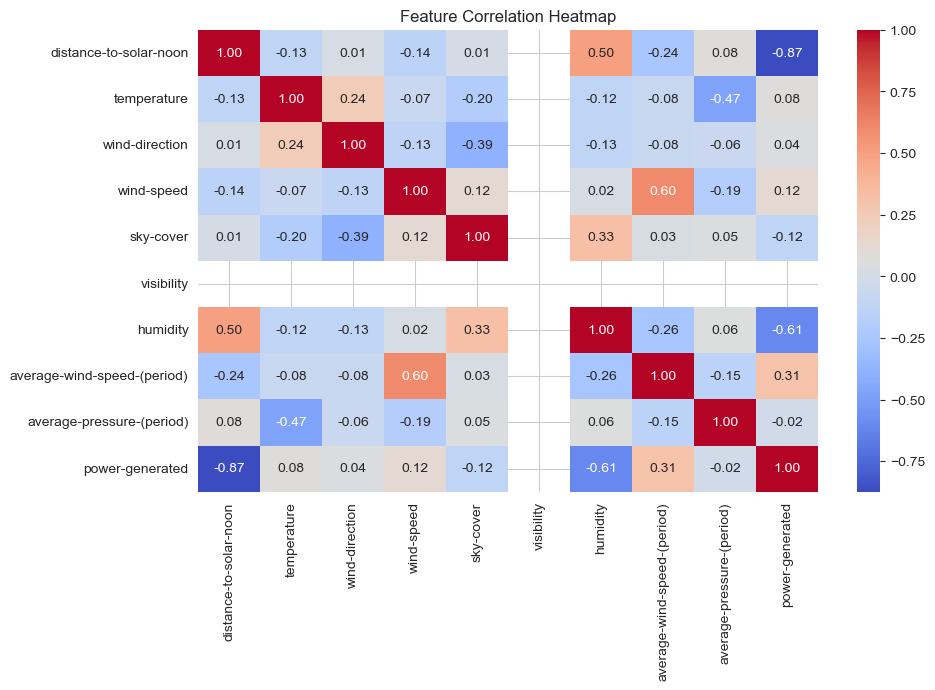

In [38]:
#heat map of correlationof feature in data
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


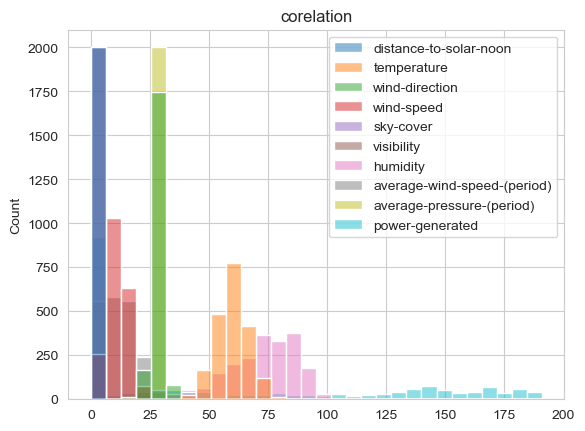

In [39]:
#histogram of correlayion 
import matplotlib.pyplot as plt
sns.histplot((df), bins=30)
plt.title('corelation')
plt.show()

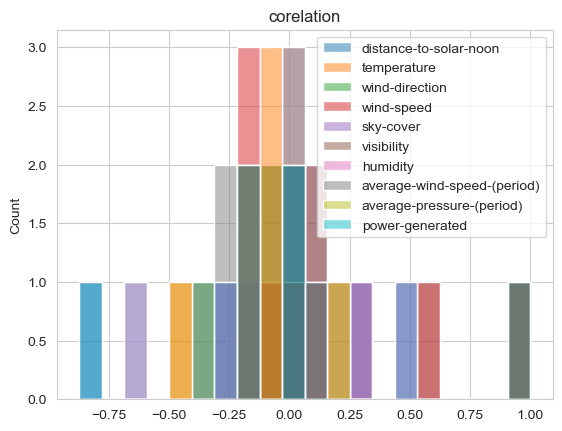

In [40]:
sns.histplot((corelation), bins=20)
plt.title('corelation')
plt.show()

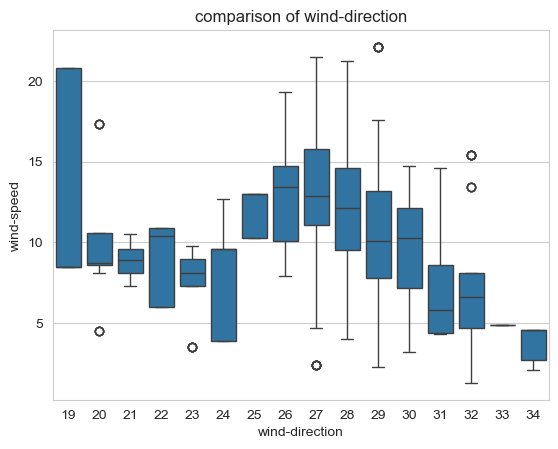

In [41]:
sns.boxplot(x='wind-direction', y='wind-speed', data=df)
plt.title('comparison of wind-direction')
plt.show()

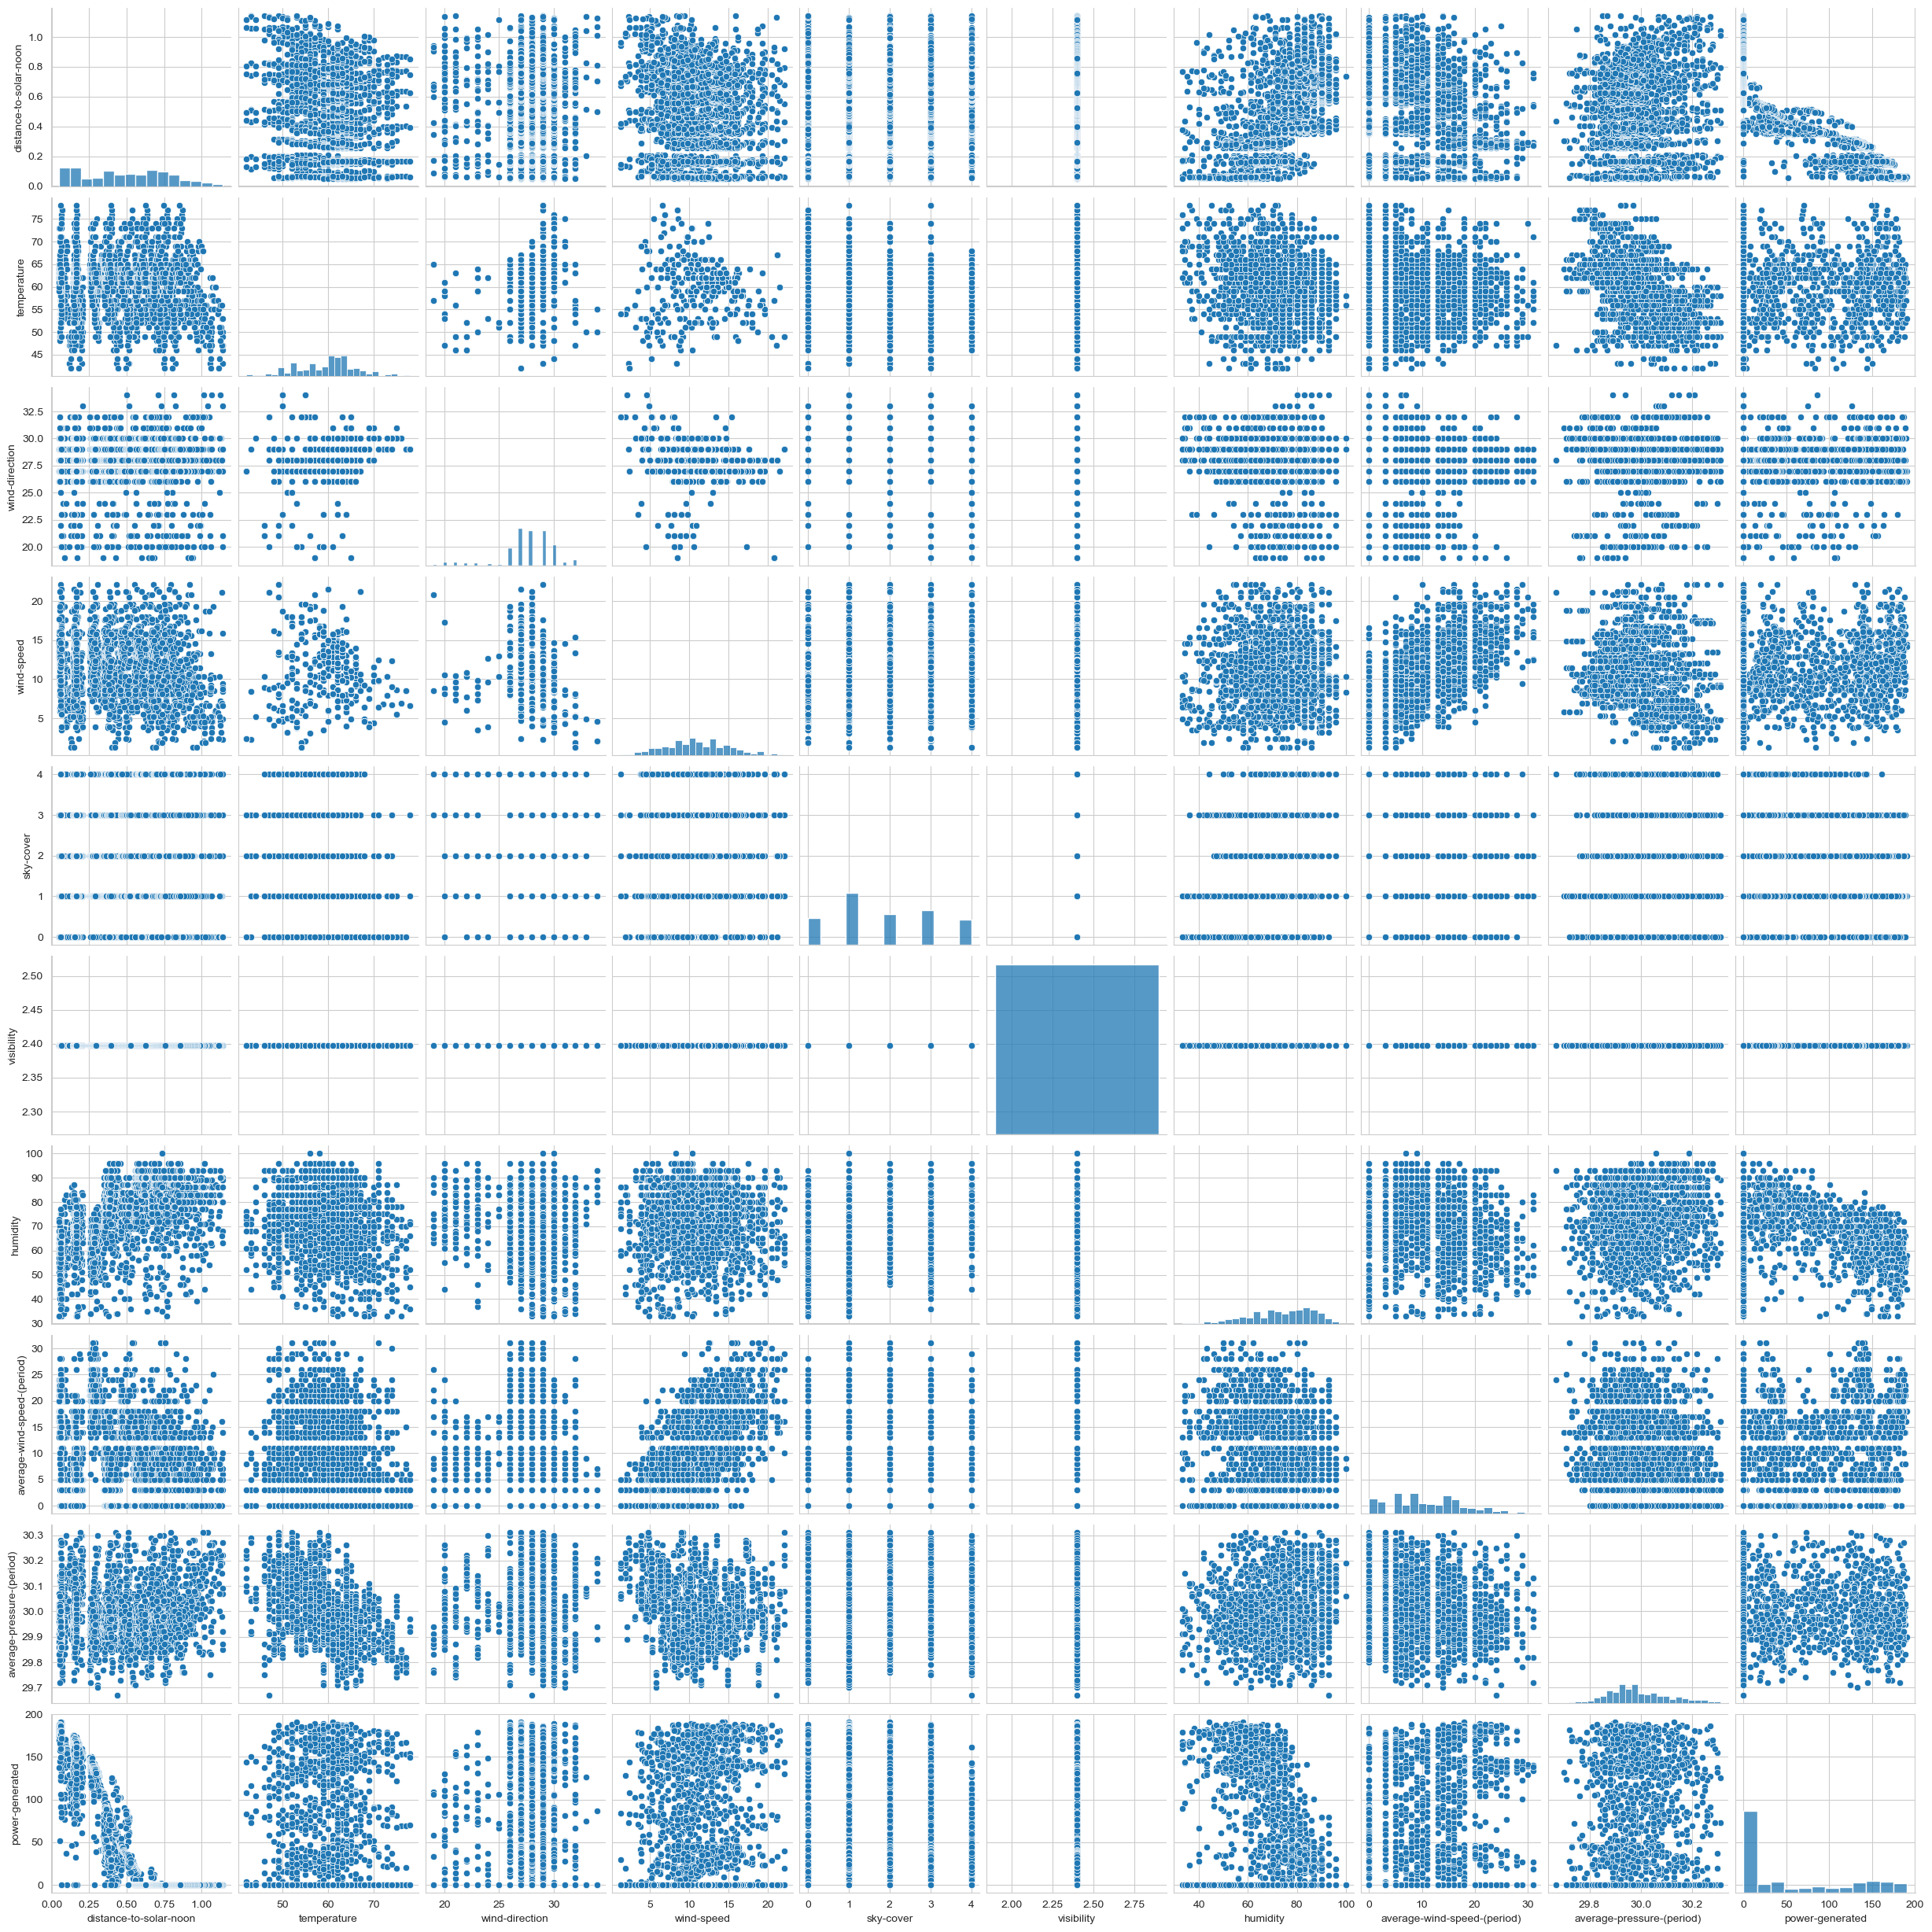

In [42]:
sns.pairplot(df)

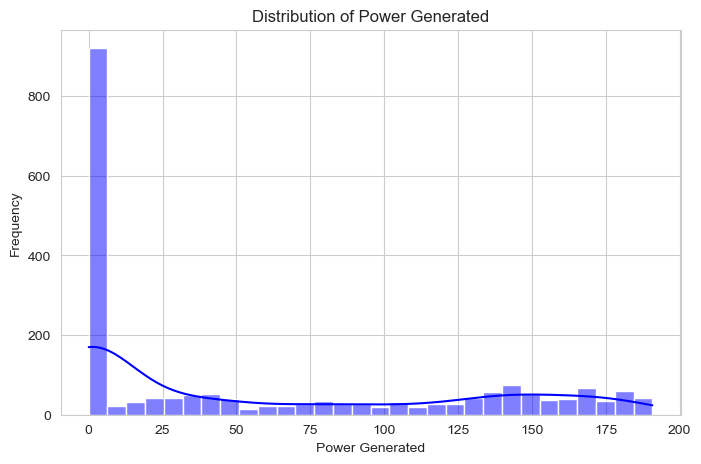

In [43]:
# Distribution of the target variable
plt.figure(figsize=(8, 5))
sns.histplot(df['power-generated'], bins=30, kde=True, color='blue')
plt.xlabel("Power Generated")
plt.ylabel("Frequency")
plt.title("Distribution of Power Generated")
plt.show()


C:\Users\obula\AppData\Local\Temp\ipykernel_20980\4168396862.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins = 15)
C:\Users\obula\AppData\Local\Temp\ipykernel_20980\4168396862.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x] , bins = 15)
C:\Users\obula\AppData\Local\Tem

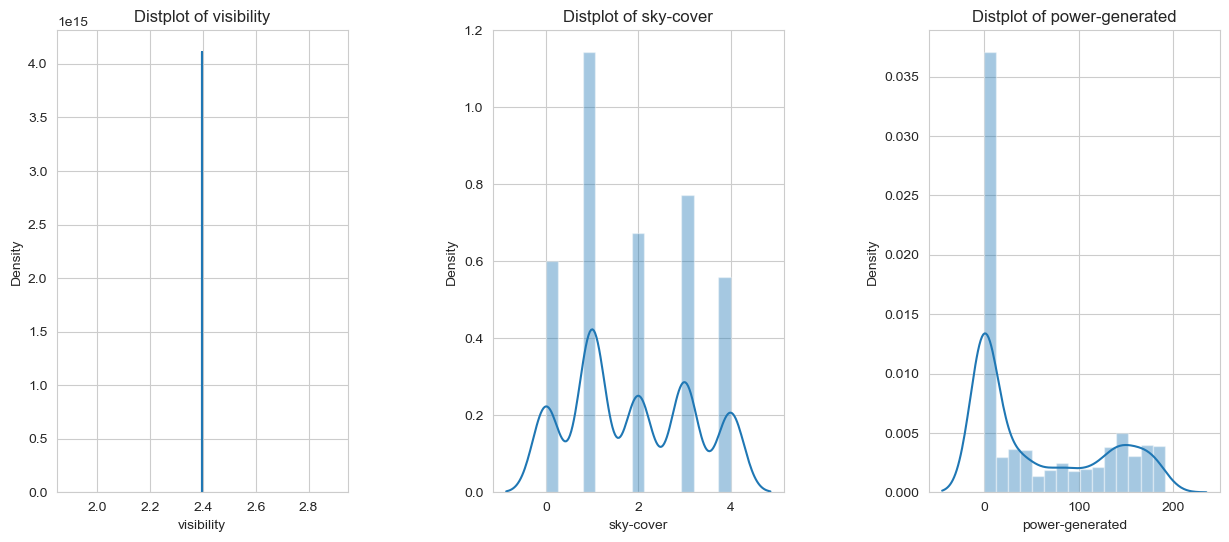

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['visibility' , 'sky-cover' , 'power-generated']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 15)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [45]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

df['power-generated'] = label_encoder.fit_transform(df['power-generated'])
df.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,2.397895,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,2.397895,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,2.397895,70,0.0,29.89,346
3,0.165810,69,28,7.5,0,2.397895,33,0.0,29.91,822
6,0.528278,69,28,7.5,0,2.397895,36,15.0,29.83,84


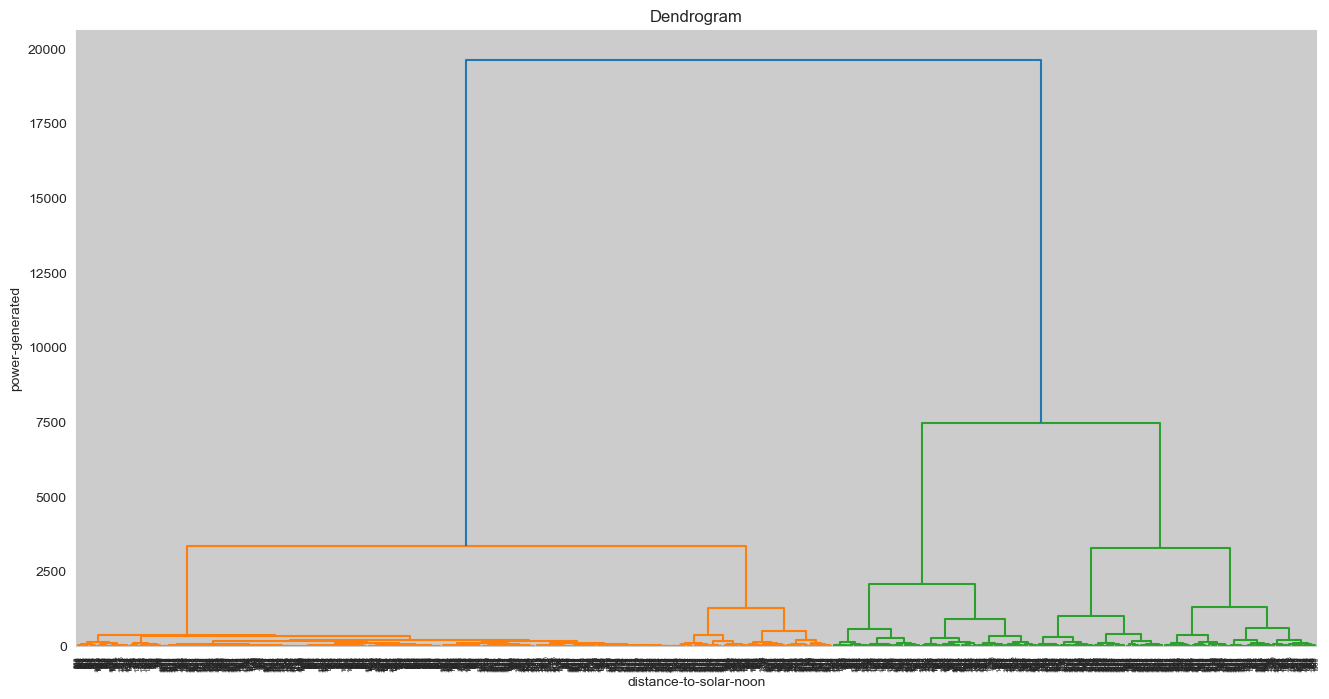

In [46]:
#using hiearchial clustering for model its usupervised model learning
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
plt.figure(1, figsize = (16 ,8))
dendrogram = sch.dendrogram(sch.linkage(df, method  = "ward"))

plt.title('Dendrogram')
plt.xlabel('distance-to-solar-noon')
plt.ylabel('power-generated')
plt.show()
# Ward method reduces the variances of the cluster

In [47]:
hc = AgglomerativeClustering(n_clusters = 5 ,linkage ='average')

y_hc = hc.fit_predict(df)
y_hc

array([2, 2, 0, ..., 3, 2, 2], dtype=int64)

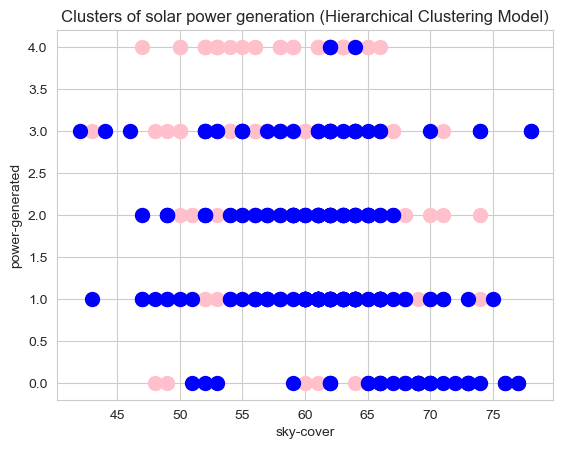

In [48]:
X = df.iloc[:, [1,4]].values
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='pink', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.title('Clusters of solar power generation (Hierarchical Clustering Model)')
plt.xlabel('sky-cover')
plt.ylabel('power-generated')
plt.show()

In [49]:

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)
# Display first few rows of standardized data
print(pd.DataFrame(data_scaled, columns=df.columns).head())


   distance-to-solar-noon  temperature  wind-direction  wind-speed  sky-cover  \
0                1.277225     1.388462        0.124705   -0.880858  -1.426521   
1                0.467444     1.388462        0.124705   -0.880858  -1.426521   
2               -0.342337     1.388462        0.124705   -0.880858  -1.426521   
3               -1.152118     1.388462        0.124705   -0.880858  -1.426521   
4                0.116539     1.388462        0.124705   -0.880858  -1.426521   

     visibility  humidity  average-wind-speed-(period)  \
0 -8.881784e-16  0.169389                    -0.456001   
1 -8.881784e-16  0.318410                    -0.885932   
2 -8.881784e-16 -0.203163                    -1.602484   
3 -8.881784e-16 -2.960048                    -1.602484   
4 -8.881784e-16 -2.736517                     0.547172   

   average-pressure-(period)  power-generated  
0                  -1.454418        -0.825430  
1                  -1.202496        -0.825430  
2                  -

In [50]:
#here kmeans and dbscan,here dbscan can handle outliers efficiently 
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score

C:\Users\obula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\obula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\obula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\obula\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

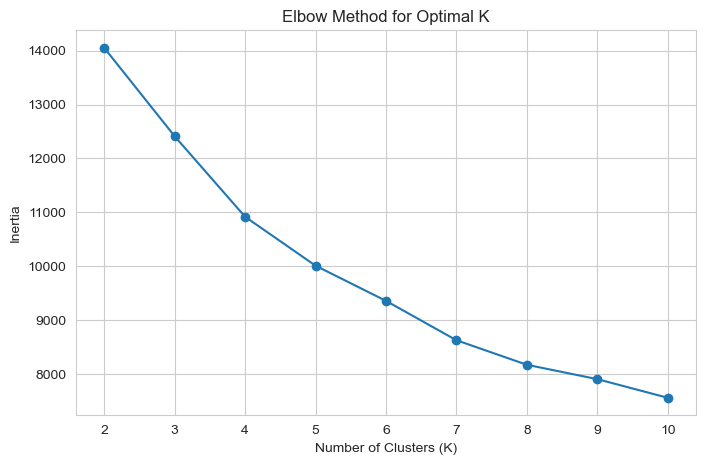

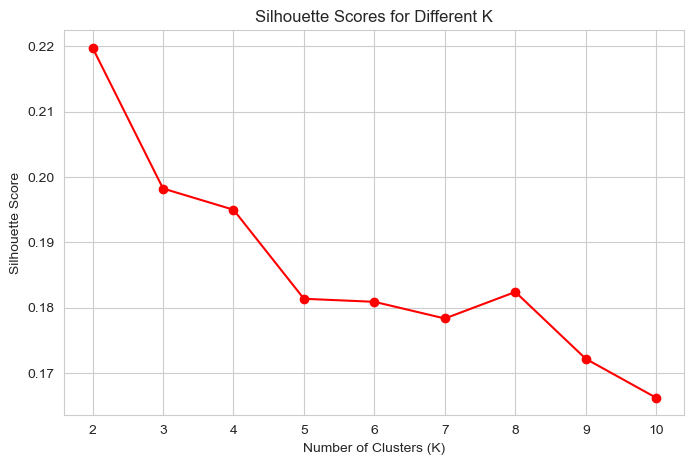

In [51]:
inertia = []
silhouette_scores = []
K = range(2, 11)

# Test different values of K
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, marker='o', color='red')
plt.title("Silhouette Scores for Different K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

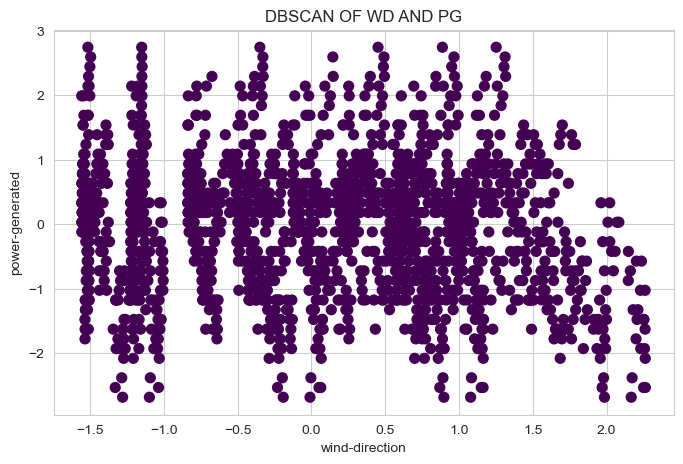

In [52]:
# Plot K-Means or DBSCAN clusters
def plot_clusters(data, labels, title):
    plt.figure(figsize=(8, 5))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50)
    plt.title("DBSCAN OF WD AND PG")
    plt.xlabel("wind-direction")
    plt.ylabel("power-generated")
    plt.show()

# Plot DBSCAN results
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)
plot_clusters(data_scaled, dbscan_labels, "DBSCAN Clustering")


In [53]:
df.fillna(df.mean(), inplace=True)  # Example to fill with mean values...


In [54]:
# Scaling features...
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)



In [55]:
scaler

StandardScaler()

In [56]:
scaled_data

array([[ 1.27722519,  1.38846234,  0.12470542, ..., -0.45600062,
        -1.45441822, -0.82542955],
       [ 0.46744415,  1.38846234,  0.12470542, ..., -0.88593178,
        -1.20249588, -0.82542955],
       [-0.34233689,  1.38846234,  0.12470542, ..., -1.60248372,
        -0.86659943,  0.17839414],
       ...,
       [-0.70171539,  0.48362171, -0.28571489, ...,  1.40703442,
        -0.95057354,  0.86888558],
       [ 0.1049551 ,  0.48362171, -0.28571489, ...,  0.83379287,
        -1.03454765, -0.53240588],
       [ 0.91162558,  0.48362171, -0.28571489, ..., -0.02606946,
        -0.78262531, -0.82542955]])

In [57]:
#df["clear_sky_ratio"] = 1 - (df["sky-cover"] / 4)
#df["clear_sky_ratio"]

In [58]:
#import numpy as np
#df["wind_x"] = df["wind-speed"] * np.cos(np.radians(df["wind-direction"]))
#df["wind_y"] = df["wind-speed"] * np.sin(np.radians(df["wind-direction"]))


In [59]:
#df["wind_x"]

In [60]:
#df["wind_y"]

In [61]:
#df["temp-range"] = df["temperature"].max() - df["temperature"].min()


In [62]:
#df["temp-range"]

In [63]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    0
average-pressure-(period)      0
power-generated                0
dtype: int64


In [64]:
#here decison tree model building

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import mean_absolute_error, r2_score
x = df.drop('power-generated', axis=1)  # Updated comment: Replace with actual target column...
y = df['power-generated']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [65]:
# Initialize Decision Tree model
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)


In [66]:
x_train.shape

(1600, 9)

In [67]:
# Train the model
dt_model.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [68]:
# Make predictions
y_pred = dt_model.predict(x_test)

In [69]:
y_pred

array([1.79100000e+02, 1.98738170e-01, 1.45238095e+00, 7.07691489e+02,
       9.76068627e+02, 1.45238095e+00, 1.98738170e-01, 9.76068627e+02,
       8.97826087e+02, 5.86677419e+02, 3.76666667e+02, 5.75200000e+02,
       9.76068627e+02, 1.98738170e-01, 1.98738170e-01, 7.07691489e+02,
       5.86677419e+02, 1.98738170e-01, 9.76068627e+02, 1.98738170e-01,
       5.86677419e+02, 1.45238095e+00, 2.60277778e+02, 1.98738170e-01,
       3.00000000e+00, 1.98738170e-01, 1.98738170e-01, 1.03076923e+02,
       2.17206349e+02, 8.97826087e+02, 1.98738170e-01, 2.60277778e+02,
       6.62400000e+01, 2.60277778e+02, 1.79100000e+02, 7.94560976e+02,
       7.07691489e+02, 9.76068627e+02, 5.86677419e+02, 1.98738170e-01,
       4.74533333e+02, 1.98738170e-01, 5.86677419e+02, 2.17714286e+02,
       2.60277778e+02, 9.76068627e+02, 1.98738170e-01, 9.76068627e+02,
       1.98738170e-01, 1.79100000e+02, 3.00000000e+00, 1.98738170e-01,
       3.00000000e+00, 1.79100000e+02, 5.75200000e+02, 1.79100000e+02,
      

In [70]:
# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [71]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 55.31
R² Score: 0.90


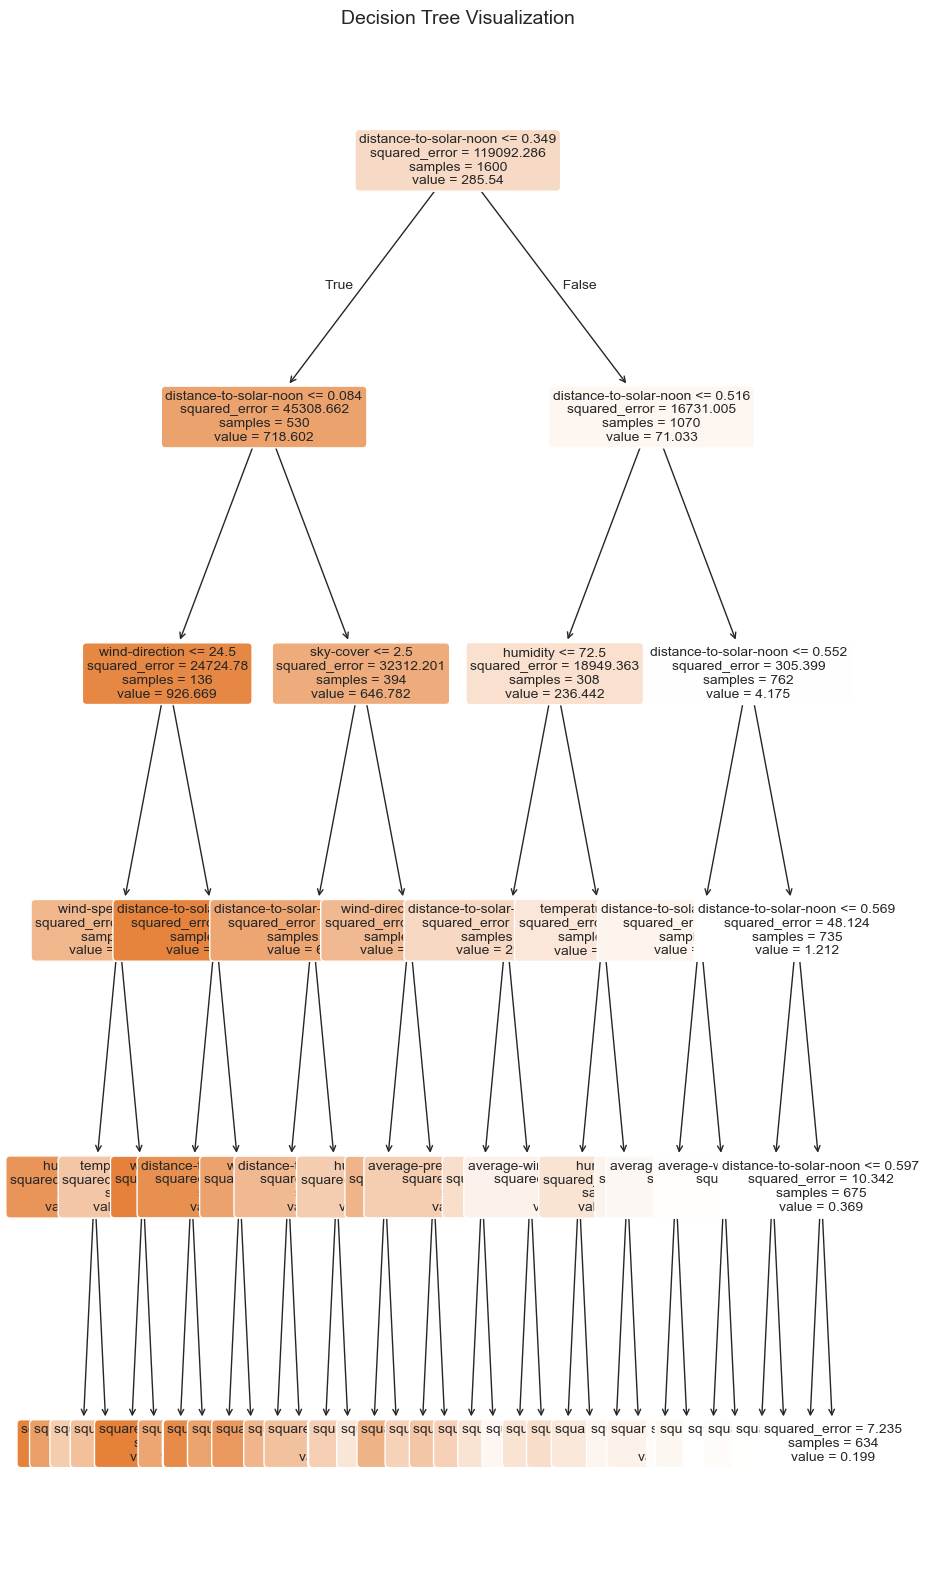

In [72]:
#ploting the tree for visualisation
plt.figure(figsize=(10, 20))  # Increase figure size
plot_tree(dt_model, feature_names=x.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization", fontsize=14)
plt.show()


In [73]:
from sklearn.tree import export_graphviz

# Export tree to a .dot file
export_graphviz(dt_model, out_file="decision_tree.dot", 
                feature_names=x.columns, filled=True, rounded=True)

print("Decision Tree structure saved as 'decision_tree.dot'.")


Decision Tree structure saved as 'decision_tree.dot'.


#check the accuracy of random forest and decision tree.

In [75]:
#here all outliers are removed from data significant data is lost 
#RANDOM FOREST
#DECESION TREE 
#XGBBOOST 

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Split data (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize models
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)  # Decision Tree
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Random Forest
xgb_model=XGBRegressor(n_estimators=100, random_state=42)#xgbboost

# Train models
dt_model.fit(x_train, y_train)
rf_model.fit(x_train, y_train)
xgb_model.fit(x_train,y_train)

# Predictions
y_pred_dt = dt_model.predict(x_test)  # Decision Tree
y_pred_rf = rf_model.predict(x_test)  # Random Forest
y_pred_xgb=xgb_model.predict(x_test) #xgboost

# Evaluate performance
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

xgb_mae=mean_absolute_error(y_test,y_pred_xgb)
xgb_r2=r2_score(y_test,y_pred_xgb)

rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Decision Tree - MAE: {dt_mae:.2f}, R²: {dt_r2:.2f}")
print(f"Random Forest - MAE: {rf_mae:.2f}, R²: {rf_r2:.2f}")
print(f"XGBBOOT - MAE: {xgb_mae:.2f}, R²: {xgb_r2:.2f}")


Decision Tree - MAE: 55.31, R²: 0.90
Random Forest - MAE: 42.09, R²: 0.93
XGBBOOT - MAE: 46.43, R²: 0.93


In [76]:
x_train.shape

(1600, 9)

In [77]:
#HERE LINEAR REGRESSION MODEL 
from sklearn.linear_model import LinearRegression
# Define features (X) and target variable (y)
# Define features (X) and target variable (y)


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
regr=LinearRegression()
regr.fit(x_train,y_train)
y_pred_lr=regr.predict(x_test)
dt_lr=r2_score(y_test,y_pred_lr)
# Evaluation
print("Linear Regression R² Score:", r2_score(y_test, y_pred_lr))
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression R² Score: 0.7818037063496934
Linear Regression MAE: 132.68316423502978
Linear Regression RMSE: 160.2150680415333


In [78]:
!pip install scikit-learn


In [79]:
#PREVISOUS SIGNIFICANT DATA REMOVED
#IN THIS ROWS-2336,COLUMNS-9 MINIMAL DATA REMOVED WHICH CAN IMPROVE MODEL PREDICTION
#GRIDSEARCH
#RANDOM SEARCH CV
#RANDOM FOREST
#DECISION TREE


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv(r"D:\data science\project\solarpowergeneration.csv")

# Define features (X) and target variable (y)
X = df.drop(columns=['power-generated'])  # Drop the target column
y = df['power-generated']

# Split dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =======================
# 🔹 RandomForestRegressor Hyperparameter Tuning
# =======================

rf = RandomForestRegressor()

# Define parameter grid
rf_param_grid = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Using RandomizedSearchCV (faster)
rf_random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=rf_param_grid, 
    n_iter=10, 
    scoring='r2', 
    cv=5, 
    random_state=42, 
    n_jobs=-1
)
rf_random_search.fit(X_train, y_train)

# Best parameters
print("Best RandomForest Parameters:", rf_random_search.best_params_)

# Train best model
best_rf = rf_random_search.best_estimator_
y_pred_rf = best_rf.predict(X_test)

# Evaluation
print("RandomForest R² Score:", r2_score(y_test, y_pred_rf))
print("RandomForest MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RandomForest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

# =======================
# 🔹 DecisionTreeRegressor Hyperparameter Tuning
# =======================

dt = DecisionTreeRegressor()

# Define parameter grid
dt_param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Using GridSearchCV (more exhaustive search)
dt_grid_search = GridSearchCV(
    estimator=dt, 
    param_grid=dt_param_grid, 
    scoring='r2', 
    cv=5, 
    n_jobs=-1
)
dt_grid_search.fit(X_train, y_train)

# Best parameters
print("Best DecisionTree Parameters:", dt_grid_search.best_params_)

# Train best model
best_dt = dt_grid_search.best_estimator_
y_pred_dt = best_dt.predict(X_test)

# Evaluation
print("DecisionTree R² Score:", r2_score(y_test, y_pred_dt))
print("DecisionTree MAE:", mean_absolute_error(y_test, y_pred_dt))
print("DecisionTree RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))


Best RandomForest Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}
RandomForest R² Score: 0.8906582465057521
RandomForest MAE: 1544.6324465986002
RandomForest RMSE: 3393.7802570310796
Best DecisionTree Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
DecisionTree R² Score: 0.8644505989403493
DecisionTree MAE: 1830.1388958885254
DecisionTree RMSE: 3778.6746771372673


In [80]:
#AS U CAN SEE THE DATA REMOVED MINIMAL
X_train.shape

(2336, 9)

In [81]:
#XGBBOOST MODEL
from  xgboost import XGBRegressor
from sklearn.metrics import accuracy_score,r2_score



xgb=XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [194]:
model_pred=xgb.predict(X_test)
model_pred
score=r2_score(y_test,model_pred)
print("XGBOOST R2 score:",score)
print("XGBOOST MAE:", mean_absolute_error(y_test, model_pred))
print("XGBOOST RMSE:", np.sqrt(mean_squared_error(y_test, model_pred)))



XGBOOST R2 score: 0.9019391536712646
XGBOOST MAE: 1589.1330097721864
XGBOOST RMSE: 3213.945833893815


In [ ]:
THIS IS ALL MODEL RESULTS CHOOSING THE BEST ONE
LINEAR REGRESSION MODEL RESULTS:
Linear Regression R² Score: 0.7818037063496934
Linear Regression MAE: 132.68316423502978
Linear Regression RMSE: 160.2150680415333

DECISION TREE RESULTS:
Best DecisionTree Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
DecisionTree R² Score: 0.8644505989403493
DecisionTree MAE: 1830.1388958885254
DecisionTree RMSE: 3778.6746771372673

RANDOM FOREST RESULTS:
Best RandomForest Parameters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}
RandomForest R² Score: 0.8892910102457829
RandomForest MAE: 1549.4588827673424
RandomForest RMSE: 3414.9326714880876

XG BOOST RESULT:
XGBBOOT R2 Score:0.9019391536712646
XGBOOST MAE: 1589.1330097721864
XGBOOST RMSE: 3213.945833893815

Based on the results we have choosen XGBOOST as best regression model



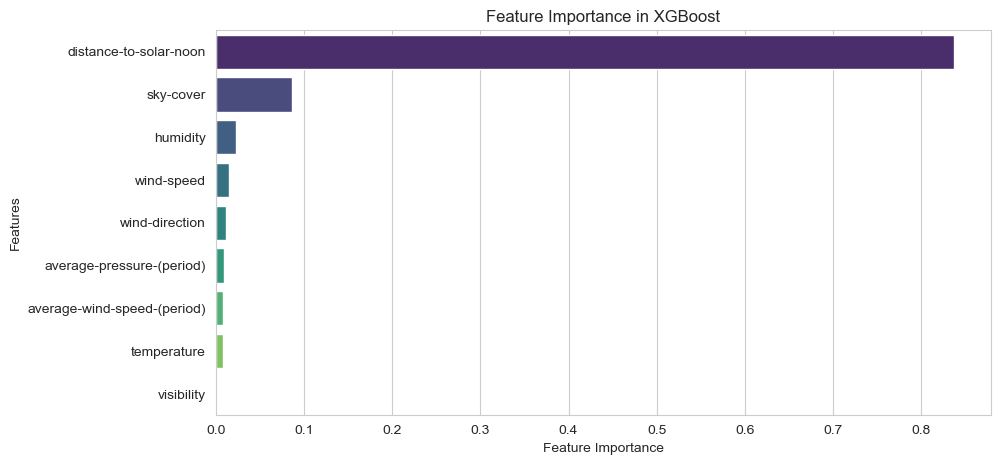

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importance from the best RandomForest model
feature_importance = best_rf.feature_importances_

# Create a DataFrame for visualization
feature_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)  # Sort by importance

# Plot feature importance with the updated Seaborn syntax
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=feature_df, palette='viridis', legend=False)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in XGBoost")
plt.show()


In [84]:
import joblib

In [85]:
#xgb model been saved here
joblib.dump(xgb,'solarproject.pkl')

['solarproject.pkl']

In [86]:
#decision tree model saved


In [87]:
models={
    'decisionTree':dt,
    'RandomRegressor':rf,
    'Xgboost':xgb_model
}

In [88]:
joblib.dump(models,'multiple_models.pkl')

['multiple_models.pkl']

In [89]:
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
#input variables for prediction for  streamlit app
model=joblib.load('solarproject.pkl')

#create streamlit 
st.title('solar power generation prediction')
st.write('enter the features for solar power prediction')


# Load the model
@st.cache_data
def load_model():
    return joblib.load('solarproject.pkl')

model = load_model()
#features input
    
#s
with st.sidebar:
    st.header('input header')
    distance_to_solar_noon=st.number_input('distance-to-solar-noon',min_value=0.00000,max_value=10.0000,value=0.0000)
    temperature=st.number_input('temperature',min_value=0,max_value=100,value=0)
    wind_direction=st.number_input('wind-direction',min_value=0,max_value=100,value=0)
    wind_speed=st.number_input('wind-speed',min_value=0.0,max_value=10.0,value=0.0)
    sky_cover=st.number_input('sky-cover',min_value=0,max_value=4,value=0)
    visibility=st.number_input('visibility',min_value=0.0,max_value=10.0,value=0.0)
    humidity	=st.number_input('humidity',min_value=0,max_value=100,value=14)
    average_wind_speed=st.number_input('average-wind-speed-(period)',min_value=0.0,max_value=10.0,value=0.0)
    average_pressure=st.number_input('average-pressure-(period)',min_value=0.00,max_value=35.00,value=0.0)
#power_generated=st.number_input('power-generated',min_value=0,max_value=40000,value=0)

input_features=np.array([[distance_to_solar_noon, temperature, wind_direction, wind_speed,
       sky_cover, visibility, humidity, average_wind_speed,
       average_pressure]])
#prediction button
if st.button('Predict'):
    features = np.array(input_features)
    prediction = model.predict(features)
    st.success(f'xgboost prediction : {prediction[0]:.2f}')
    
#uploading fil csv
upload_file=st.file_uploader("upload the csv file",type=["csv"])
if upload_file is not None:
    data=pd.read_csv(upload_file)
    st.write('upload_file')
    st.write(data)
    predict_file=model.predict(data)
    data['prediction']=predict_file
    st.write('prediction')
    st.write(data)
    #download the predicted file
    st.download_button (
        
        label="download_prediction",
        data=data.to_csv(index="False").encode('utf-8'),
        file_name='predicted.csv',
        mime='csv/text'
    )



#here visualization of prediction using boxplot
if st.button("Show Predictions Plot"):
    plt.figure(figsize=(10, 6))
    plt.plot(predict_file, label='Predictions')
    plt.xlabel('Samples')
    plt.ylabel('Solar Energy Output')
    plt.title('Predicted Solar Energy Output')
    plt.legend()
    st.pyplot(plt)
        
    

2025-03-27 17:35:37.135 
  command:

    streamlit run C:\Users\obula\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-27 17:35:37.135 No runtime found, using MemoryCacheStorageManager
2025-03-27 17:35:37.135 No runtime found, using MemoryCacheStorageManager
2025-03-27 17:35:37.151 Session state does not function when running a script without `streamlit run`


In [91]:
prediction=model.predict(x_test)

In [92]:
#instaling streamlit 

In [93]:
!pip install streamlit

In [94]:
import os
print(os.getcwd())

C:\Users\obula


In [95]:
#streamlit code 
streamlit_code="""
import streamlit as st
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt


model=joblib.load('solarproject.pkl')

#create streamlit 
st.title('solar power generation prediction')
st.write('enter the features for solar power prediction')


# Load the model
@st.cache_data
def load_model():
    return joblib.load('solarproject.pkl')

model = load_model()
#features input
    

with st.sidebar:
    st.header('input header')
    distance_to_solar_noon=st.number_input('distance-to-solar-noon',min_value=0.00000,max_value=10.0000,value=0.0000)
    temperature=st.number_input('temperature',min_value=0,max_value=100,value=0)
    wind_direction=st.number_input('wind-direction',min_value=0,max_value=100,value=0)
    wind_speed=st.number_input('wind-speed',min_value=0.0,max_value=10.0,value=0.0)
    sky_cover=st.number_input('sky-cover',min_value=0,max_value=4,value=0)
    visibility=st.number_input('visibility',min_value=0.0,max_value=10.0,value=0.0)
    humidity	=st.number_input('humidity',min_value=0,max_value=100,value=14)
    average_wind_speed=st.number_input('average-wind-speed-(period)',min_value=0.0,max_value=10.0,value=0.0)
    average_pressure=st.number_input('average-pressure-(period)',min_value=0.00,max_value=35.00,value=0.0)
#power_generated=st.number_input('power-generated',min_value=0,max_value=40000,value=0)

input_features=np.array([[distance_to_solar_noon, temperature, wind_direction, wind_speed,
       sky_cover, visibility, humidity, average_wind_speed,
       average_pressure]])

if st.button('Predict'):
    features = np.array(input_features)
    prediction = model.predict(features)
    st.success(f'xgboost prediction : {prediction[0]:.2f}')
    
#uploading fil csv
upload_file=st.file_uploader("upload the csv file",type=["csv"])
if upload_file is not None:
    data=pd.read_csv(upload_file)
    st.write('upload_file')
    st.write(data)
    predict_file=model.predict(data)
    data['prediction']=predict_file
    st.write('prediction')
    st.write(data)
    #download the predicted file
    st.download_button (
        
        label="download_prediction",
        data=data.to_csv(index="False").encode('utf-8'),
        file_name='predicted.csv',
        mime='csv/text'
    )




if st.button("Show Predictions Plot"):
    plt.figure(figsize=(10, 6))
    plt.plot(predict_file, label='Predictions')
    plt.xlabel('Samples')
    plt.ylabel('Solar Energy Output')
    plt.title('Predicted Solar Energy Output')
    plt.legend()
    st.pyplot(plt)
        
    
"""
#saving the code in app.py
with open('app.py', 'w') as f:
    f.write(streamlit_code)


In [96]:
import os
print(os.listdir())

['.anaconda', '.conda', '.condarc', '.continuum', '.ipynb_checkpoints', '.ipython', '.jupyter', '.keras', '.matplotlib', '.streamlit', '.virtual_documents', '.vscode', '50_Startups.csv', 'anaconda3', 'ansel', 'app.py', 'AppData', 'Application Data', 'associative_rules_assignment.ipynb', 'Basics_python_assignment.ipynb', 'Basics_stats-2_assignment.ipynb', 'Basics_stats_1.ipynb', 'binimial_normal_26_11_24.ipynb', 'blogs.csv', 'chisqaure test.ipynb', 'class_assignment_done.ipynb', 'clustering_assignment1.ipynb', 'cluster_asignment.ipynb', 'Contacts', 'Cookies', 'Copy_of_SKWENESS_KURTOSIS (1)(class).ipynb', 'CrossDevice', 'day 5 bosplot 30-10-24.ipynb', 'day 6  boxplot31-10-24.ipynb', 'day_4 histogram.ipynb', 'decisiontree_assisgnment.ipynb', 'decision_tree.dot', 'decisonTree_13_12_24.ipynb', 'Documents', 'Downloads', 'EDA1ASSIGNMENT.ipynb', 'eda2pipscore.ipynb', 'EDA2_Assignment.ipynb', 'elbow_method_kmeans_28_11_24.ipynb', 'Favorites', 'humidity_boxplot.png', 'HYPOTHESIS TEST_t value_pva